<a href="https://colab.research.google.com/github/j-5912d/Math_Statistics/blob/main/HomeTask_10_Math_Static.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задание 1

Провести дисперсионный анализ для определения того, есть ли различия среднего роста среди взрослых футболистов, хоккеистов и штангистов. Даны значения роста в трех группах случайно выбранных спортсменов:

 Футболисты: 173, 175, 180, 178, 177, 185, 183, 182. Хоккеисты: 177, 179, 180, 188, 177, 172, 171, 184, 180.
 Штангисты: 172, 173, 169, 177, 166, 180, 178, 177, 172, 166, 170.


In [29]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd


In [4]:
Football_pl = np.array([173, 175, 180, 178, 177, 185, 183, 182])
Hockey_pl = np.array([177, 179, 180, 188, 177, 172, 171, 184, 180])
Weightlifters = np.array([172, 173, 169, 177, 166, 180, 178, 177, 172, 166, 170])

In [6]:
n_foot = len(Football_pl)
n_hock = len(Hockey_pl)
n_weig = len(Weightlifters)
n_foot, n_hock, n_weig

(8, 9, 11)

In [8]:
n = n_hock + n_foot + n_weig
n

28

In [22]:
df = pd.DataFrame({'Height' : np.concatenate([Football_pl, Hockey_pl, Weightlifters]),'group': np.repeat(['Football players', 'Hockey players', 'Weightlifters'], repeats = [n_foot, n_hock, n_weig])})

In [23]:
df

,Height,group
0,173,Football players
1,175,Football players
2,180,Football players
3,178,Football players
4,177,Football players
5,185,Football players
6,183,Football players
7,182,Football players
8,177,Hockey players
9,179,Hockey players


In [32]:
mean_foot = np.mean(Football_pl)
mean_hock = np.mean(Hockey_pl)
mean_weig = np.mean(Weightlifters)
mean_foot, mean_hock, mean_weig

(179.125, 178.66666666666666, 172.72727272727272)

In [37]:
mean_total = np.mean(df['Height'])
mean_total

176.46428571428572

In [44]:
np.sum((df['Height'] - mean_total)**2)

830.9642857142854

In [58]:
s_f = np.sum((mean_foot - mean_total)**2)*n_foot + np.sum((mean_hock - mean_total)**2)*n_hock + np.sum((mean_weig - mean_total)**2) * n_weig
s_f

253.9074675324678

In [59]:
s_ost  = np.sum((mean_foot - Football_pl)**2) + np.sum((mean_hock - Hockey_pl)**2) + np.sum((mean_weig - Weightlifters)**2)
s_ost

577.0568181818182

In [60]:
s_f + s_ost

830.964285714286

In [48]:
k = 3

In [61]:
D_f = s_f / (k - 1)
D_f

126.9537337662339

In [62]:
D_ost = s_ost / (n - k)
D_ost

23.08227272727273

In [63]:
F_n = D_f / D_ost
F_n

5.500053450812598

In [39]:
f = stats.f_oneway(Football_pl, Hockey_pl, Weightlifters)
f

F_onewayResult(statistic=5.500053450812596, pvalue=0.010482206918698694)

поскольку pvalue меньше чем уровень статистической значимости а = 0.05 % то присутствуют статистически значимые различия, и рост зависит от вида спорта.

Ниже проверим с помощью специальной функции и построим график для наглядности

In [25]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [26]:
tukey = pairwise_tukeyhsd(endog = df['Height'], groups = df['group'], alpha = 0.05)

In [28]:
print(tukey)

          Multiple Comparison of Means - Tukey HSD, FWER=0.05          
     group1          group2     meandiff p-adj   lower    upper  reject
-----------------------------------------------------------------------
Football players Hockey players  -0.4583  0.979  -6.2732  5.3566  False
Football players  Weightlifters  -6.3977 0.0219 -11.9583 -0.8372   True
  Hockey players  Weightlifters  -5.9394 0.0284 -11.3181 -0.5607   True
-----------------------------------------------------------------------


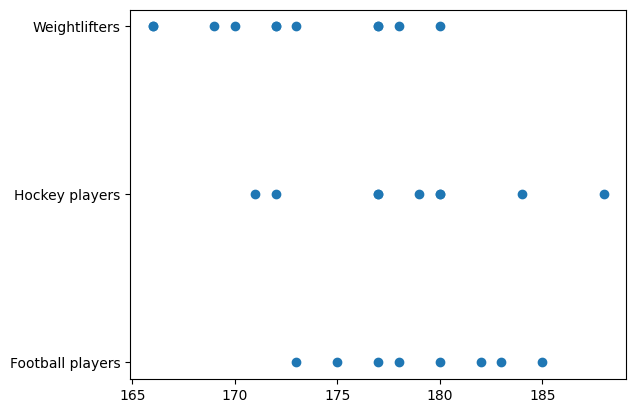

In [64]:
plt.scatter(df['Height'], df['group'])

# Вывод
Как видно из расчетов, статистические значимые различия есть, между парами хокеисты и штангисты, футболисты и штангисты. Статистически значимые различия между футболистами и хокеистами не найдены.

Данная промежуточная аттестация оценивается по системе "зачет" / "не зачет". "Зачет" ставится, если Слушатель успешно выполнил задание. "Незачет" ставится, если Слушатель не выполнил задание. Критерии оценивания: 1 - Слушатель провел дисперсионный анализ для определения того, есть ли различия среднего роста среди взрослых футболистов, хоккеистов и штангистов.